In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [4]:
df = pd.read_csv('../data/Salary_Data.csv')
df.head(10)

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
5              2.9  56642.0
6              3.0  60150.0
7              3.2  54445.0
8              3.2  64445.0
9              3.7  57189.0

In [5]:
d=pd.DataFrame(df)
d

YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

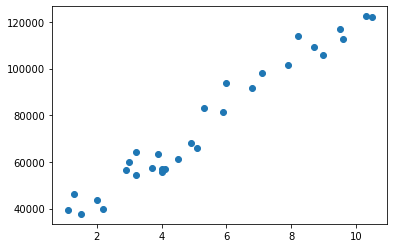

In [6]:
x=np.array(d.YearsExperience)
y=np.array(d.Salary)
plt.scatter(x,y)

In [7]:
def calculate(x,y):
    m = (((np.mean(x)*np.mean(y))-np.mean(x*y))/
    ((np.mean(x)**2)-np.mean(x**2)))
    
    b = np.mean(y)-m*np.mean(x)
    
    return m,b

In [8]:
m,b = calculate(x,y)
print("Coef: ", m)
print("Intercept: ", b)

Coef:  9449.962321455081
Intercept:  25792.200198668666


In [9]:
pred_y = []
for i in x:
    pred_y.append(m*i+b)
    
print(pred_y)

[36187.15875226926, 38077.151216560276, 39967.14368085129, 44692.12484157883, 46582.11730586985, 53197.0909308884, 54142.08716303391, 56032.07962732493, 56032.07962732493, 60757.06078805247, 62647.05325234348, 63592.04948448899, 63592.04948448899, 64537.04571663449, 68317.03064521652, 72097.01557379856, 73987.00803808958, 75877.0005023806, 81546.97789525366, 82491.97412739915, 90051.94398456322, 92886.93268099974, 100446.9025381638, 103281.89123460032, 108006.87239532787, 110841.8610917644, 115566.84225249194, 116511.83848463744, 123126.812109656, 125016.80457394701]


Text(0.5, 1.0, 'Simple Linear Regression')

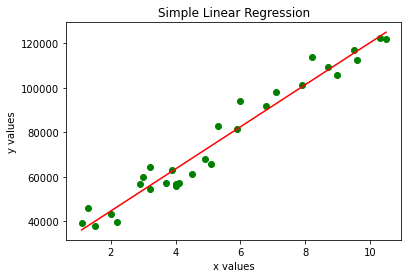

In [10]:
plt.scatter(x,y, color='green')
plt.plot(x,pred_y, color='r')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Simple Linear Regression')

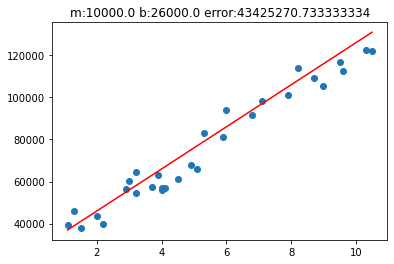

In [12]:
new_m = np.linspace(9000,10000,50)
new_b = np.linspace(20000,26000,50)

loss = []
for m,b in zip(new_m, new_b):
    yprd = [(m*i)+b for i in x]
    SSE = np.sum((y-yprd)**2)
    MSE = SSE/len(x) #Mean squared error
    loss.append([m,b,SSE,MSE])
    plt.scatter(x,y)
    plt.plot(x,yprd,c='r')
    plt.title('m:{} b:{} error:{}'.format(m,b,MSE))
    plt.pause(0.001)
    clear_output(wait=True)

In [13]:
dff = pd.DataFrame(loss, columns=['m','b','SSE','MSE'])
dff.head()

m             b           SSE           MSE
0  9000.000000  20000.000000  2.994260e+09  9.980867e+07
1  9020.408163  20122.448980  2.878308e+09  9.594359e+07
2  9040.816327  20244.897959  2.765748e+09  9.219160e+07
3  9061.224490  20367.346939  2.656582e+09  8.855272e+07
4  9081.632653  20489.795918  2.550808e+09  8.502694e+07

In [17]:
dff[dff.SSE==dff.SSE.min()]

m             b           SSE           MSE
35  9714.285714  24285.714286  9.547587e+08  3.182529e+07

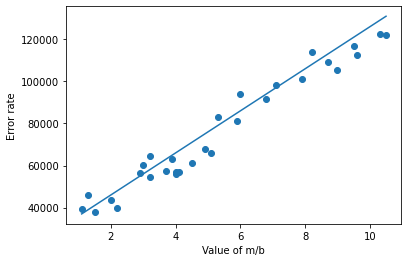

In [22]:
X = df.iloc[:,0]
Y = df.iloc[:,-1]
plt.scatter(X,Y, marker='o')
plt.plot(X,yprd)
plt.xlabel("Value of m/b")
plt.ylabel("Error rate")
plt.show()